In [34]:
# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

## Metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('airlinesClean.csv')## Data is clean already

In [54]:
y = df.iloc[:,1]
X = df.iloc[:,2:] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [55]:
## Make a RandomForest instance
forest1 = RandomForestClassifier(random_state=42)

## Fit the model on the training set
forest1.fit(X_train, y_train)

## Use the predict() on the testing set. Assign those predictions to a variable.
pred1 = forest1.predict(X_test)

In [56]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5929
           1       0.99      1.00      0.99     26443

    accuracy                           0.99     32372
   macro avg       0.98      0.97      0.98     32372
weighted avg       0.99      0.99      0.99     32372



In [39]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

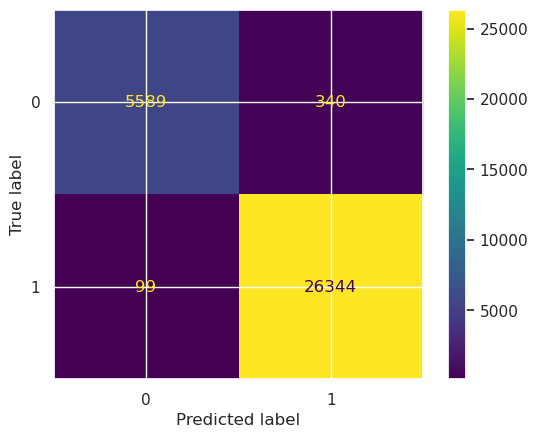

In [40]:
conf_matrix_plot(forest1, X_test , y_test)

In [41]:
## forest1.estimators_
len(forest1.estimators_)

100

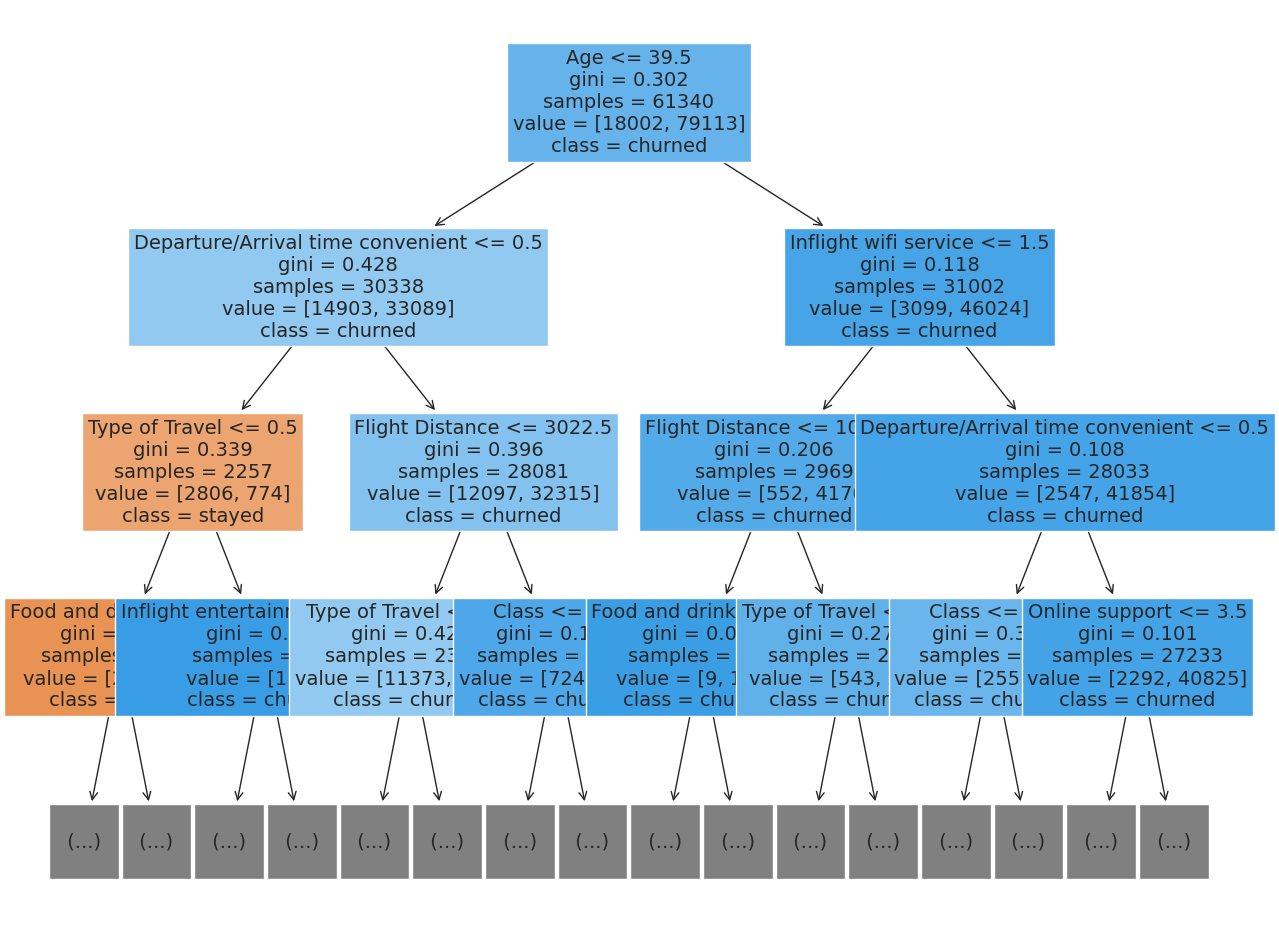

In [42]:
# Plot the 100th tree of the random forest
plt.figure(figsize=(15,12))
plot_tree(forest1.estimators_[99], max_depth=3, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

In [25]:
forest1.__dir__()

['base_estimator',
 'n_estimators',
 'estimator_params',
 'bootstrap',
 'oob_score',
 'n_jobs',
 'random_state',
 'verbose',
 'warm_start',
 'class_weight',
 'max_samples',
 'criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'ccp_alpha',
 'feature_names_in_',
 'n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'base_estimator_',
 'estimators_',
 '__module__',
 '__doc__',
 '__init__',
 '__abstractmethods__',
 '_abc_impl',
 '_get_oob_predictions',
 '_set_oob_score_and_attributes',
 '_validate_y_class_weight',
 'predict',
 'predict_proba',
 'predict_log_proba',
 '_more_tags',
 '_estimator_type',
 'score',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclas

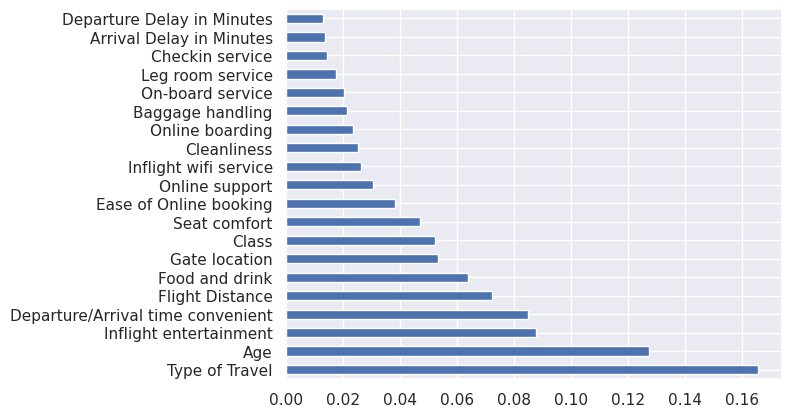

In [43]:
importances = forest1.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax);

In [44]:
## Grid Search

rfPara = pd.read_csv('rfParameters.csv')
rfPara

,Parameter,Description,Possible Values,Best Options
0,n_estimators,The number of trees in the forest.,"Integer, e.g. 100, 200, 500",100-1000
1,max_depth,The maximum depth of the trees in the forest.,"Integer, e.g. 3, 5, 10",5-10
2,min_samples_split,The minimum number of samples required to spli...,"Integer, e.g. 2, 5, 10",2-10
3,min_samples_leaf,The minimum number of samples required to be a...,"Integer, e.g. 1, 2, 5",1-5
4,max_features,The number of features to consider when lookin...,"Integer, ""auto"", ""sqrt"", ""log2""","""auto"""
5,criterion,The function to measure the quality of a split.,"""gini"", ""entropy""","""gini"""
6,bootstrap,Whether to bootstrap the samples when building...,"Boolean, True, False",TRUE
7,oob_score,Whether to calculate an out-of-bag score.,"Boolean, True, False",TRUE



1. Create a dictionary of the parameters to adjust and values as a list of options.

```
rf_para = {
            'n_estimators':[100, 200, 500],
            'max_depth': [3, 4, 5, 6, 7, 11],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": ["auto", "sqrt", "log2"],

            
}
```

2. Select the metrics

```
scoring = {'accuracy', 'precision', 'recall', 'f1'}
```

3. Instantiate the classifier

```
tuned_rf = RandomForest(random_state=42)
```

4. Instantiate the GridSearchCV object and Pass as arguments, and fit

```
clf = GridSearchCV(
                   tuned_rf, 
                   decision_tree_parameters, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")
                   
clf.fit(X_train, y_train)
```


In [47]:
## Create a dictionary of the parameters to adjust and values as a list of options.

rf_para = {
            'n_estimators':[100, 200, 500],
            'max_depth': [3, 4, 5, 6, 7, 11],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": ["auto", "sqrt", "log2"],          
}

## Select the metrics

scoring = {'accuracy', 'precision', 'recall', 'f1'}

## Instantiate the classifier

tuned_rf = RandomForestClassifier(random_state=42)

## Instantiate the GridSearchCV object and Pass as arguments, and fit

clf = GridSearchCV(
                   tuned_rf, 
                   rf_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")
                   
clf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [48]:
## After 7 hours obtaining best average Validation Score:
best_params = clf.best_params_
print(best_params)
print(f'BestScore: {round(clf.best_score_, 3)}')

{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
BestScore: 0.983


In [50]:
## Testisg best score.
## Make a decision tree instance
rf2 = RandomForestClassifier(**best_params, random_state=42)

## Fit the model on the training set
rf2.fit(X_train, y_train)

## Use the predict() on the testing set. Assign those predictions to a variable.
rf_pred2 = rf2.predict(X_test)


In [51]:
## Classification Report

print(classification_report(y_test, rf_pred2))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5929
           1       0.98      0.99      0.98     26443

    accuracy                           0.97     32372
   macro avg       0.97      0.94      0.95     32372
weighted avg       0.97      0.97      0.97     32372



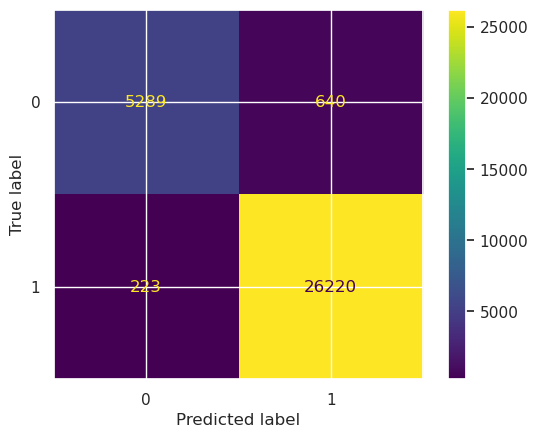

In [52]:
## Confusion Matrix:

cm = confusion_matrix(y_test, rf_pred2, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=rf2.classes_,
                                 )
  
disp.plot(values_format='') 
plt.show();

# Effective default settings